<a href="https://colab.research.google.com/github/rohanbhavsar64/ML-codes/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02 00:00:00+00:00,24.347170,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05 00:00:00+00:00,23.661268,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06 00:00:00+00:00,23.663502,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07 00:00:00+00:00,23.995310,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08 00:00:00+00:00,24.917267,27.972500,28.037500,27.174999,27.307501,237458000


In [3]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-3-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000


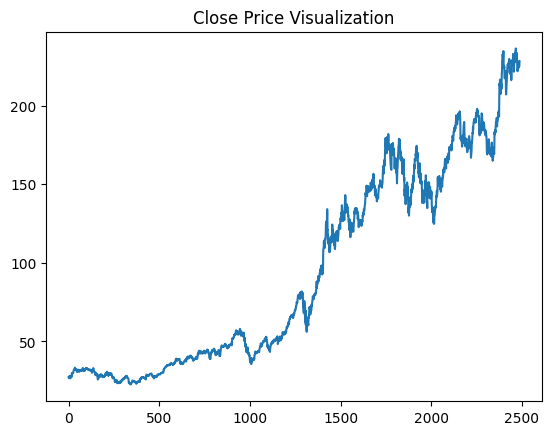

In [4]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

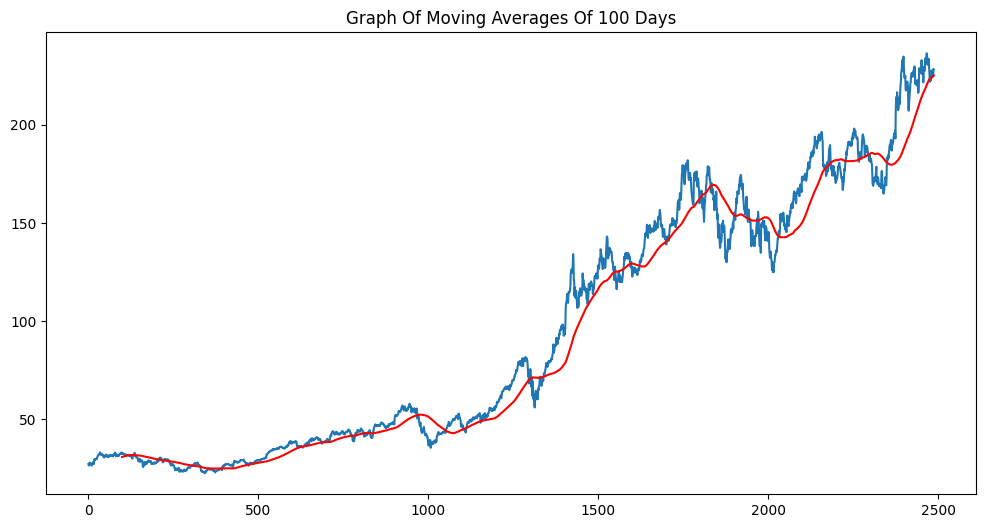

In [5]:
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [6]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)
train.head()

(1741, 7)
(747, 7)


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02 00:00:00+00:00,24.347170,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05 00:00:00+00:00,23.661268,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06 00:00:00+00:00,23.663502,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07 00:00:00+00:00,23.995310,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08 00:00:00+00:00,24.917267,27.972500,28.037500,27.174999,27.307501,237458000


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03224352],
       [0.02874507],
       [0.02733846],
       ...,
       [0.96653022],
       [0.98405852],
       [0.99220961]])

In [8]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1641, 100, 1)

In [9]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 458ms/step - MAE: 0.1588 - loss: 0.0610
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - MAE: 0.0602 - loss: 0.0080
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 316ms/step - MAE: 0.0532 - loss: 0.0070
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - MAE: 0.0458 - loss: 0.0056
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - MAE: 0.0406 - loss: 0.0044
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 35s 314ms/step - MAE: 0.0418 - loss: 0.0044
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - MAE: 0.0418 - loss: 0.0044
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - MAE: 0.0384 - loss: 0.0040
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - MAE: 0.0393 - loss: 0.0040
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - MAE: 0.0418 - loss: 0.0043


In [12]:
model.save('keras_model.h5')
test_close.shape
test_close
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

In [13]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [14]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(847, 1)

In [15]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(747, 100, 1)
(747,)


In [16]:
# Making predictions
y_pred = model.predict(x_test)
y_pred.shape
(627, 1)
y_test

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


array([0.36597752, 0.30495108, 0.32236129, 0.36371056, 0.40052592,
       0.421926  , 0.45112442, 0.45810668, 0.46572362, 0.43561851,
       0.43652521, 0.42237942, 0.41276754, 0.39254633, 0.40759882,
       0.43507432, 0.46336604, 0.47968816, 0.49292711, 0.48939066,
       0.48893724, 0.48141093, 0.48549156, 0.49827709, 0.45765326,
       0.43044978, 0.4249184 , 0.39898441, 0.42301423, 0.45928554,
       0.4318099 , 0.42546245, 0.41022856, 0.37876319, 0.36280373,
       0.3457563 , 0.27684076, 0.29787819, 0.30513248, 0.3093036 ,
       0.35029022, 0.41113526, 0.43652521, 0.44577443, 0.4348023 ,
       0.4217446 , 0.42419296, 0.42854548, 0.46001085, 0.42963371,
       0.39780555, 0.3843852 , 0.41784551, 0.41603197, 0.40170478,
       0.38103015, 0.34439605, 0.32263332, 0.25235765, 0.33278924,
       0.34693503, 0.34276391, 0.35165034, 0.37522674, 0.34394277,
       0.3161951 , 0.28681543, 0.31955029, 0.28844757, 0.27502722,
       0.23512884, 0.23766782, 0.27466457, 0.30340957, 0.32272

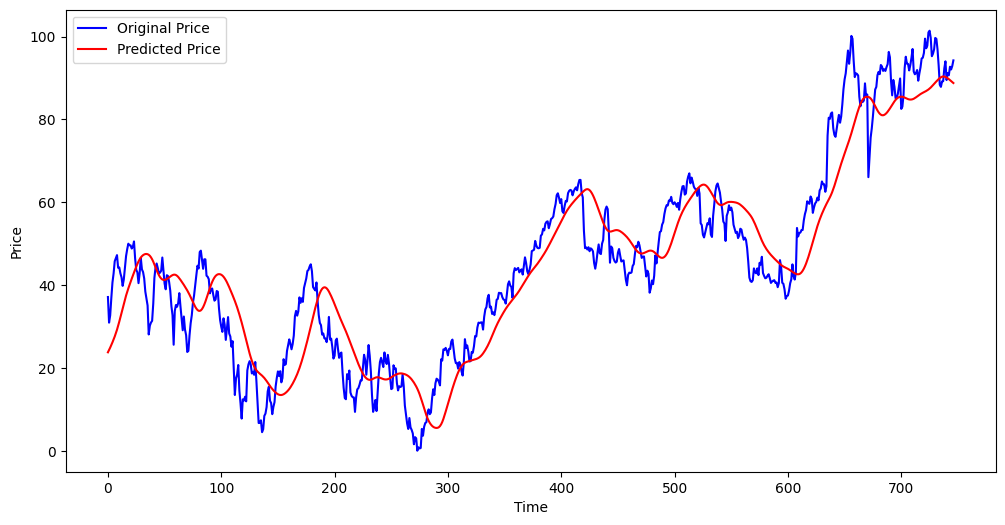

In [17]:
y_pred
scaler.scale_
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
import pickle
pickle.dump(model,open('model.pkl','wb'))